In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('Dataset .csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset .csv'

In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df['Cuisines'].fillna('Unknown', inplace=True)

C:\Users\paart\AppData\Local\Temp\ipykernel_34336\2626648470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


In [ ]:
df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose'], axis=1, inplace=True)

In [ ]:
categorical_cols = ['City', 'Locality', 'Cuisines', 'Currency', 
                    'Has Table booking', 'Has Online delivery', 
                    'Is delivering now', 'Switch to order menu', 
                    'Rating color', 'Rating text']

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)


['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
X = df_encoded.drop('Aggregate rating', axis=1)
y = df_encoded['Aggregate rating']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.04025834382516599
R² Score: 0.9823126467157041


In [ ]:
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print(comparison.head(10))


   Actual  Predicted
0     2.1   2.338022
1     4.1   3.995667
2     3.2   3.042604
3     4.4   4.134658
4     3.5   3.557725
5     0.0  -0.003330
6     3.2   3.050016
7     0.0   0.017235
8     3.6   3.608788
9     4.0   4.122303


In [ ]:
from xgboost import XGBRegressor

xgb_model= XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Mean Squared Error:", mse_xgb)
print("XGBoost R² Score:", r2_xgb)

XGBoost Mean Squared Error: 0.028787139373158927
XGBoost R² Score: 0.9873524776292699


In [ ]:
print("Linear Regression R² Score:", r2_score(y_test, model.predict(X_test)))
print("XGBoost R² Score:", r2_xgb)

Linear Regression R² Score: 0.9823126467157041
XGBoost R² Score: 0.9873524776292699


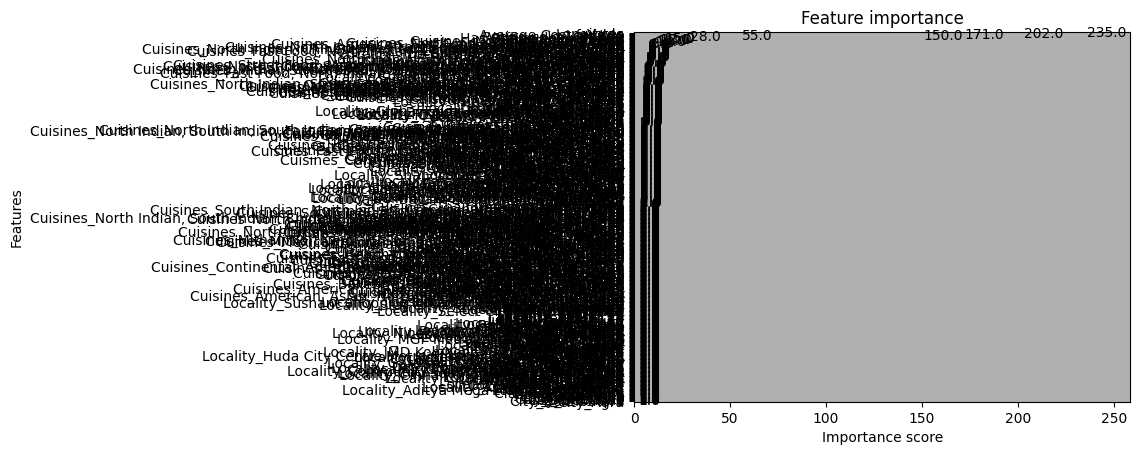

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()
